In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import re
import csv
import pickle
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
w, h = 128, 128
numCategory = 12
filIm = open('/content/drive/My Drive/wkDir/image_uyir_128x128.obj', 'rb')
images = pickle.load(filIm)
filLab = open('/content/drive/My Drive/wkDir/label_uyir_128x128.obj', 'rb')
labels = pickle.load(filLab)

In [ ]:
def plotIm(img_):
  plt.imshow(img_, cmap='gray')
  plt.show()

In [ ]:
tamilCharacterCode = []
w,h=128,128
with open('/content/drive/My Drive/wkDir/unicodeTamil.csv', newline='') as f:
  reader = csv.reader(f)
  data = list(reader)
  for i in data:
    go = i[1].split(' ')
    charL = ""
    for gg in go:
      charL = charL + "\\u"+str(gg)
    tamilCharacterCode.append(charL.encode('utf-8').decode('unicode-escape'))
print(tamilCharacterCode)

['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஃ', 'க', 'ங', 'ச', 'ஞ', 'ட', 'ண', 'த', 'ந', 'ப', 'ம', 'ய', 'ர', 'ல', 'வ', 'ழ', 'ள', 'ற', 'ன', 'ஸ', 'ஷ', 'ஜ', 'ஹ', 'க்ஷ', 'கி', 'ஙி', 'சி', 'ஞி', 'டி', 'ணி', 'தி', 'நி', 'பி', 'மி', 'யி', 'ரி', 'லி', 'வி', 'ழி', 'ளி', 'றி', 'னி', 'ஸி', 'ஷி', 'ஜி', 'ஹி', 'க்ஷி', 'கீ', 'ஙீ', 'சீ', 'ஞீ', 'டீ', 'ணீ', 'தீ', 'நீ', 'பீ', 'மீ', 'யீ', 'ரீ', 'லீ', 'வீ', 'ழீ', 'ளீ', 'றீ', 'னீ', 'ஸீ', 'ஷீ', 'ஜீ', 'ஹீ', 'க்ஷீ', 'கு', 'ஙு', 'சு', 'ஞு', 'டு', 'ணு', 'து', 'நு', 'பு', 'மு', 'யு', 'ரு', 'லு', 'வு', 'ழு', 'ளு', 'று', 'னு', 'கூ', 'ஙூ', 'சூ', 'ஞூ', 'டூ', 'ணூ', 'தூ', 'நூ', 'பூ', 'மூ', 'யூ', 'ரூ', 'லூ', 'வூ', 'ழூ', 'ளூ', 'றூ', 'னூ', 'ா', 'ெ', 'ே', 'ை', 'ஸ்ரீ', 'ஸு', 'ஷு', 'ஜு', 'ஹு', 'க்ஷு', 'ஸூ', 'ஷூ', 'ஜ0BC2', 'ஹூ', 'க்ஷூ', 'க்', 'ங்', 'ச்', 'ஞ்', 'ட்', 'ண்', 'த்', 'ந்', 'ப்', 'ம்', 'ய்', 'ர்', 'ல்', 'வ்', 'ழ்', 'ள்', 'ற்', 'ன்', 'ஸ்', 'ஷ்', 'ஜ்', 'ஹ்', 'க்ஷ்', 'ஔ']


In [ ]:
images=np.array(images)
labels=np.array(labels,dtype=np.uint8)
y_labels=to_categorical(labels)
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.33, random_state=42)
keras.initializers.lecun_uniform(seed=None)
print(X_train.shape, y_train.shape)

(4454, 128, 128, 1) (4454, 12)


ஓ


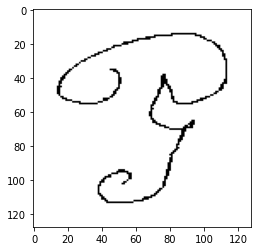

In [ ]:
ridx = np.random.randint(X_train.shape[0])
print(tamilCharacterCode[np.argmax(y_train[ridx])])
plotIm(X_train[ridx].reshape(w,h))

In [ ]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(w,h,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(numCategory, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 124, 124, 64)      1664      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 32)        51232     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)       

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=1)
TrainAccuracy = model.evaluate(X_train, y_train, verbose=1)
TestAccuracy = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
45/45 [==============================] - 4s 79ms/step - loss: 1.7387 - accuracy: 0.4001 - val_loss: 0.6861 - val_accuracy: 0.7763
Epoch 2/10
45/45 [==============================] - 3s 74ms/step - loss: 0.5454 - accuracy: 0.8240 - val_loss: 0.4191 - val_accuracy: 0.8665
Epoch 3/10
45/45 [==============================] - 3s 75ms/step - loss: 0.3138 - accuracy: 0.8952 - val_loss: 0.2388 - val_accuracy: 0.9198
Epoch 4/10
45/45 [==============================] - 3s 74ms/step - loss: 0.2158 - accuracy: 0.9286 - val_loss: 0.2023 - val_accuracy: 0.9326
Epoch 5/10
45/45 [==============================] - 3s 75ms/step - loss: 0.1840 - accuracy: 0.9398 - val_loss: 0.1944 - val_accuracy: 0.9399
Epoch 6/10
45/45 [==============================] - 3s 74ms/step - loss: 0.1324 - accuracy: 0.9551 - val_loss: 0.1597 - val_accuracy: 0.9476
Epoch 7/10
45/45 [==============================] - 3s 75ms/step - loss: 0.1158 - accuracy: 0.9600 - val_loss: 0.1399 - val_accuracy: 0.9572
Epoch 8/10
45

In [ ]:
model.save("/content/drive/My Drive/wkDir/tamilUyirEzhuthukalKeras_Model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
print(keras.__version__)
import tensorflow as tf
print(tf.__version__)

2.4.3
2.3.0


In [ ]:
a = []
while(1):
    a.append('1')